In [2]:
import numpy as np
import scipy.io
import seaborn as sns

from matplotlib import animation
import matplotlib.pyplot as plt
import seaborn as sns # named from Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing.
import pandas as pd
import os

directory = '/Users/mkals/data/OximeterTestingData/Logs'

def plot_pressure(df, new=True):
    if new:
        plt.figure()

    title = 'pressure'
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.p)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Pressure (atm)')

def plot_processed(df, new=True):
    if new:
        plt.figure()

    title = 'processed'
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.red_sig)
    plt.plot(df.utc_time, df.ir_sig)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])

def plot_raw(df, new=True):
    if new:
        plt.figure()

    title = 'raw'
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.r)
    plt.plot(df.utc_time, df.i)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])


In [15]:
# Load files from disk and plot latest

fs = [f'{directory}/{f}' for f in os.listdir(directory)]
csv_files = [f for f in fs if '.csv' in f]
csv_files.sort()
#print(csv_files)

b_dfs = [pd.read_csv(f) for f in csv_files if 'bath' in f]
p_dfs = [pd.read_csv(f) for f in csv_files if 'pressure' in f]

#plot_pressure(p_dfs[-1])
#plot_raw(b_dfs[-1])
#plot_processed(b_dfs[-1])
df = pd.read_csv(csv_files[0])
print(df.head())

       utc_time      red  beat_red  pulse_red  pulse_red_threshold  red_sig  \
0  1.625135e+09   5745.0       0.0      200.0                495.0   5745.0   
1  1.625135e+09   8632.0       0.0      200.0                500.0   8632.0   
2  1.625135e+09  11212.0       0.0      200.0                500.0  11212.0   
3  1.625135e+09  13572.0       0.0      200.0                500.0  13572.0   
4  1.625135e+09  15774.0       0.0      200.0                500.0  15774.0   

   ir_sig        r        i  SPO2  beatAvg  rollHrAvg  SPO2Avg  
0   641.0  59937.0  70087.0   0.0      0.0        0.0      0.0  
1  1530.0  59906.0  69975.0   0.0      0.0        0.0      0.0  
2  3289.0  59904.0  70013.0   0.0      0.0        0.0      0.0  
3  5383.0  59949.0  70133.0   0.0      0.0        0.0      0.0  
4  7592.0  59956.0  70194.0   0.0      0.0        0.0      0.0  


1625135487.5880034
1625135547.539809
1625135586.5692966
1625135646.522402
1625136026.0495448
1625136085.990701


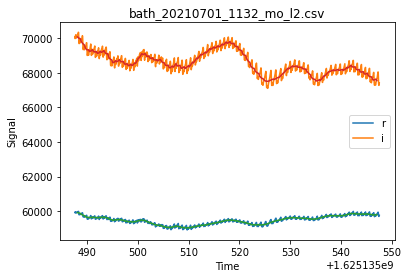

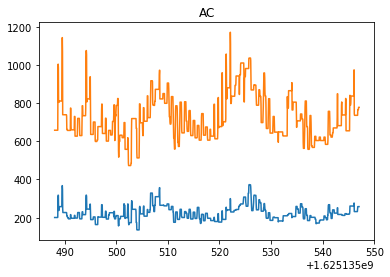

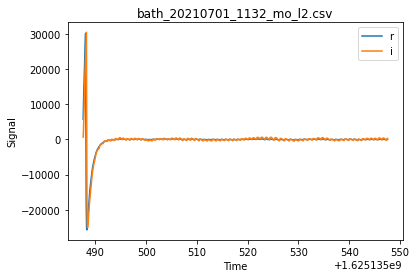

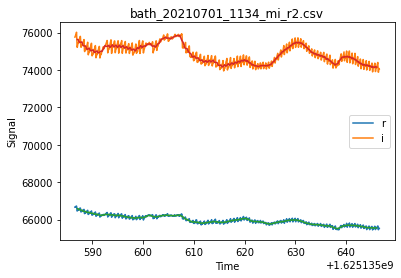

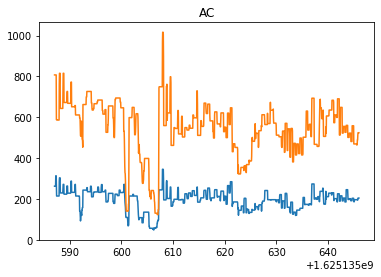

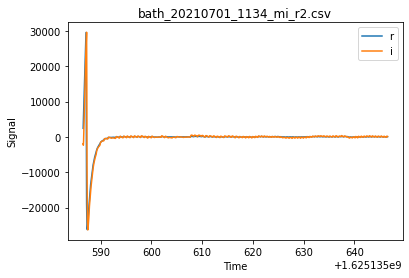

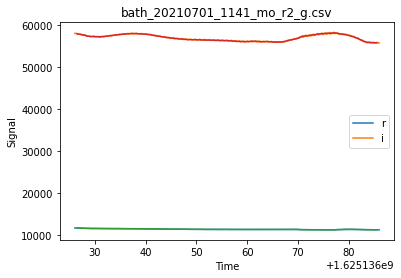

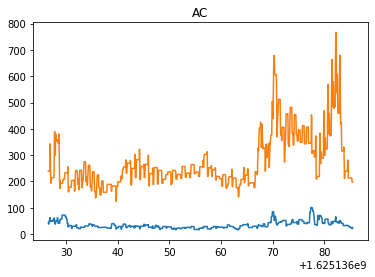

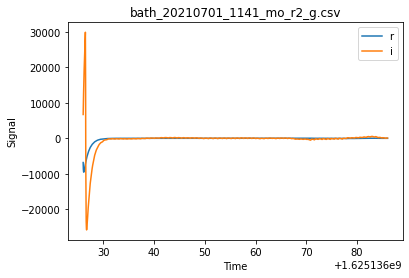

In [39]:
def plot_processed(f):
    title = f.split('/')[-1]
    df = pd.read_csv(f)
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.red_sig)
    plt.plot(df.utc_time, df.ir_sig)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])

def plot_raw(f):
    title = f.split('/')[-1]
    df = pd.read_csv(f)
    #df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.r)
    plt.plot(df.utc_time, df.i)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])

# data: full list to be processed
# splits: numeber of consecutive elements to be processed
# func: lambda function that takes the subset and returns what should be stored in return array
def map_reduce(data, splits, func):
    data = list(data)
    return [func(data[i:i + splits]) for i in range(len(data) - splits + 1)]

def plot_amplitude(f):
    title = f.split('/')[-1]
    df = pd.read_csv(f)
    print(df.utc_time[0])
    print(list(df.utc_time)[-1])
    
    period = 1
    mesurement_interval = (df.utc_time.iloc[-1] - df.utc_time.iloc[0]) / df.shape[0]
    point_count = int(period / mesurement_interval)

    times = map_reduce(df.utc_time, point_count, np.mean)
    dc_r = map_reduce(df.r, point_count, np.mean)
    dc_i = map_reduce(df.i, point_count, np.mean)
    ac_r = map_reduce(df.r, point_count, (lambda x: max(x) - min(x)) )
    ac_i = map_reduce(df.i, point_count, (lambda x: max(x) - min(x)) )

    plt.plot(times, dc_r)
    plt.plot(times, dc_i)
    
    plt.figure()
    plt.title('AC')
    plt.plot(times, ac_r)
    plt.plot(times, ac_i)

    # print(mesurement_interval)
    # print(point_count)
    # print(df.shape[0])

    # Defining Splits
    splits = point_count
    


for f in csv_files[:3]:
    plt.figure()
    plot_raw(f)
    plot_amplitude(f)
    plt.figure()
    plot_processed(f)